In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

animal_data_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
df = animal_data_complete

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [12]:
df_animal_data = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
tumor_response = df_animal_data.groupby(["Drug", "Timepoint"])

In [35]:
mean_tumor_volume = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].mean())
pd.set_option('display.max_rows', None)
mean_tumor_volume

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Naftisol  0                   45.000000
          5                   46.796098
          10                  48.694210
          15                  50.933018
          20                  53.644087
          25                  56.731968
          30                  59.559509
          35                  62.685087
          40                  65.600754
          45                  69.265506
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082
Propriva  0                   45.000000
          5                   47.248967
          10                  49.101541
          15                  51.067318
          20                  53.346737
          25                  55.504138
          30                  58.196374
          35                  60.350199
          40                  63.045537
          45                  66.258529
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40         

In [36]:
standard_error_of_tumor_volumes = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].sem())
pd.set_option('display.max_rows', None)
standard_error_of_tumor_volumes

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484
          25                   0.755413
          30                   0.934121
          35                   1.127867
          40                   1.158449
          45                   1.453186
Naftisol  0                    0.000000
          5                    0.202385
          10                   0.319415
          15                   0.444378
          20                   0.595260
          25                   0.813706
          30                   0.975496
          35                   1.013769
          40                   1.118567
          45                   1.416363
Placebo   0                    0.000000
          5                    0.218091
          10                   0.402064
          15                   0.614461
          20                   0.839609
          25                   1.034872
          30                   1.218231
          35                   1.287481
          40                   1.370634
          45                   1.351726
Propriva  0                    0.000000
          5                    0.231708
          10                   0.376195
          15                   0.466109
          20                   0.555181
          25                   0.577401
          30                   0.746045
          35                   1.084929
          40                   1.564779
          45                   1.888586
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40         

In [46]:
mean_tumor_volume_format = mean_tumor_volume.reset_index()
mean_tumor_volume_format_df = mean_tumor_volume_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
mean_tumor_volume_format_df 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [135]:
standard_error_of_tumor_volumes_format = standard_error_of_tumor_volumes.reset_index()
standard_error_of_tumor_volumes_df = standard_error_of_tumor_volumes_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
standard_error_of_tumor_volumes_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


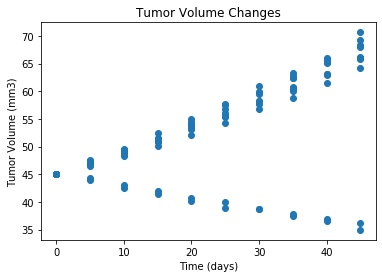

In [202]:
x_axis = mean_tumor_volume_format["Timepoint"]
y_axis = mean_tumor_volume_format["Tumor Volume (mm3)"]
plt.title("Tumor Volume Changes")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis, y_axis)

#plt.legend()
plt.savefig("tumor_volume_plot.png")
plt.show()

